flow= 0.0566336932 [m3/s]
pressure_1= -33863.9 [Pa]
pressure_2= 137895.1458 [Pa]
z1= -0.6096 [m]
z2= 1.524 [m]
a1= 0.018241469247509915 [m2]
v1= 3.1046673067593438 [m/s]
a2= 0.008107319665559963 [m2]
v2= 6.985501440208523 [m/s]
equation result (check only)= -3.552713678800501e-15
pump height required= 27.16702304958529 [m]
pump shaft power= 11923.754719358594 [W]
pump shaft power= 15.99001846061547 [hp]


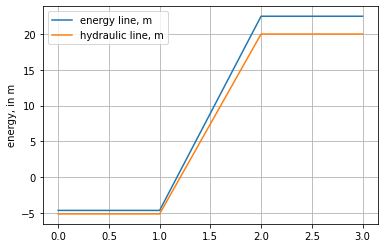

In [1]:
from math import pi
from scipy.optimize import fsolve
import matplotlib.pyplot as plt


#input data
rho=760 #fluid density, kg/m3

d1=6*0.0254 #diamter_suction, m
d2=4*0.0254 #diamter_discharging, m

z1=-2*0.3048 #height_suction, m 
z2=5*0.3048 #height_discharging, m

p1=-10*3386.39 #gaugePressure_suction, Pa
p2=20*6894.75729 #gaugePressure_discharging, Pa

v_flow=2*0.0283168466 #volumeFlow, m3/s


#calculations
a1=(pi*d1**2)/4  #x section area, suction, m2
v1=v_flow/a1 #velocity, suction, m/s

a2=(pi*d2**2)/4 #x section area, discharging, m2
v2=v_flow/a2 #x section area, discharge, m/s

#energy function, losses ignored
f=lambda e: p1/(rho*9.81)+z1+(v1**2)/(2*9.81)+e-p2/(rho*9.81)-(v2**2)/(2*9.81)-z2

#head pump result, in m
x=fsolve(f,0)[0]
#pump shaft power converted to W
p_pump=v_flow*790*9.81*x
#pump pressure converted to hp
p_pump_hp=p_pump/745.699872


#printouts
print('flow=',v_flow, '[m3/s]')
print('pressure_1=', p1, '[Pa]')
print('pressure_2=', p2, '[Pa]')

print('z1=',z1, '[m]')
print('z2=',z2, '[m]')
print('a1=',a1, '[m2]')
print('v1=',v1, '[m/s]')
print('a2=',a2, '[m2]')
print('v2=',v2, '[m/s]')

print('equation result (check only)=',f(x))

print('pump height required=', x, '[m]')
print('pump shaft power=', p_pump, '[W]')

print('pump shaft power=', p_pump_hp, '[hp]')

e1=p1/(rho*9.81)+z1+(v1**2)/(2*9.81)
h1=p1/(rho*9.81)+z1

e2=p2/(rho*9.81)+z2+(v2**2)/(2*9.81)
h2=p2/(rho*9.81)+z2

plt.plot([e1,e1,e2,e2],label='energy line, m')
plt.plot([h1,h1,h2,h2],label='hydraulic line, m')
plt.ylabel('energy, in m')
plt.legend()
plt.grid()
plt.show()